## Comparing Multi-layers Networks
Then we fixed the parameters: 
* learning rate - 0.0001
* batch size - 256
* architectures - 128 -> 100 vs 256 -> 100 vs 128 -> 256 -> 100 vs 
* activation function - relu 
* epochs - 200
* Same train and validation sets

Reference MLP : https://github.com/zalandoresearch/fashion-mnist 

In [1]:
import sys 
sys.path.append('../')
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 


base_dir = '../data/fashion'
print(os.listdir(base_dir))

['train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']


/root/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from utils import mnist_reader, dataset_helper
X, y = mnist_reader.load_mnist('../data/fashion', kind='train')

In [3]:
X = X.copy() / 255.

In [4]:
X.shape, y.shape

((60000, 784), (60000,))

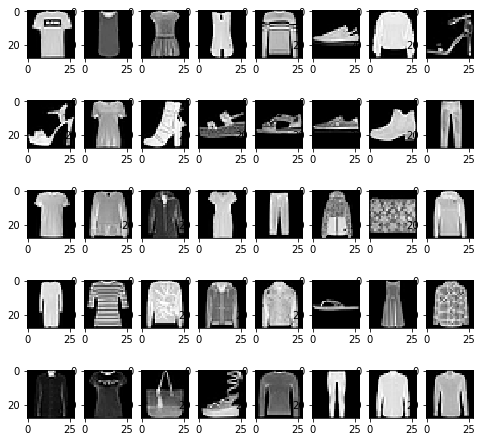

In [5]:
import numpy as np
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 8
rows = 5

for i in range(1, columns*rows +1):
    img = X[i].reshape((28, 28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()


In [6]:
nclasses =10
X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42)    
y_train = dataset_helper.one_hot_encode(y_train, nclasses)
y_val = dataset_helper.one_hot_encode(y_val, nclasses)

In [7]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 784), (12000, 784), (48000, 10), (12000, 10))

In [8]:
lr = 0.0001
b_sz = 256
eps = np.finfo(np.float64).eps
nfeatures  = X_train.shape[1]
epoch_sz = X_train.shape[0]
max_iter = 1000 * (epoch_sz // b_sz) 
print_interval = 10 * (epoch_sz // b_sz) 


## Model 128 -> 100

Model Summary
-------------------------------
H1      (input=784, neurons=128, activation=relu)
H2      (input=128, neurons=100, activation=relu)
soft    (input=100, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 1870 Batch: 178 Epoch 9 Train Loss: 0.09711616 lr: 0.000100 Val Loss: 0.07687332 Val Acc 0.84616667
It: 3740 Batch: 168 Epoch 19 Train Loss: 0.07115223 lr: 0.000100 Val Loss: 0.06921159 Val Acc 0.85983333
It: 5610 Batch: 158 Epoch 29 Train Loss: 0.06384340 lr: 0.000100 Val Loss: 0.06472730 Val Acc 0.86950000
It: 7480 Batch: 148 Epoch 39 Train Loss: 0.05920342 lr: 0.000100 Val Loss: 0.06399963 Val Acc 0.86883333
It: 9350 Batch: 138 Epoch 49 Train Loss: 0.05544391 lr: 0.000100 Val Loss: 0.06030530 Val Acc 0.87991667
It: 11220 Batch: 128 Epoch 59 Train Loss: 0.05230319 lr: 0.000100 Val Loss: 0.05890406 Val Acc 0.88158333
It: 13090 Batch: 118 Epoch 69 Train Loss: 0.04963632 lr: 0.000100 Val Loss: 0.05820812 Val Acc 0.88216667
It: 14960 Batch: 108 Epo

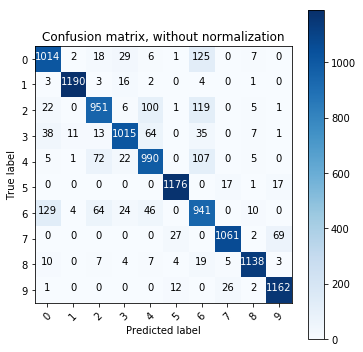

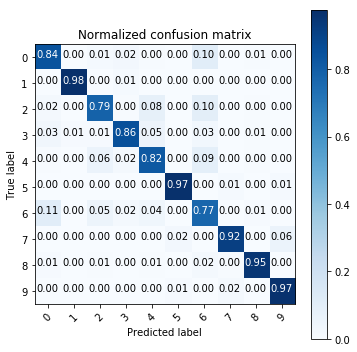

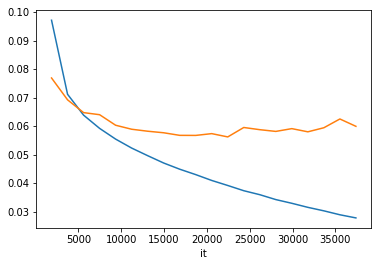

In [9]:
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 128, 'relu',  label="H1")
h2 = network.Layer(128, 100, 'relu',  label="H2")
o1 = network.Layer(100, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(h2)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

## Model 256 -> 100

Model Summary
-------------------------------
H1      (input=784, neurons=256, activation=relu)
H2      (input=256, neurons=100, activation=relu)
soft    (input=100, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 1870 Batch: 178 Epoch 9 Train Loss: 0.09345863 lr: 0.000100 Val Loss: 0.07817801 Val Acc 0.84308333
It: 3740 Batch: 168 Epoch 19 Train Loss: 0.06882977 lr: 0.000100 Val Loss: 0.06703089 Val Acc 0.86575000
It: 5610 Batch: 158 Epoch 29 Train Loss: 0.06130046 lr: 0.000100 Val Loss: 0.06259495 Val Acc 0.87408333
It: 7480 Batch: 148 Epoch 39 Train Loss: 0.05614387 lr: 0.000100 Val Loss: 0.06032572 Val Acc 0.87900000
It: 9350 Batch: 138 Epoch 49 Train Loss: 0.05233465 lr: 0.000100 Val Loss: 0.05808982 Val Acc 0.88483333
It: 11220 Batch: 128 Epoch 59 Train Loss: 0.04890144 lr: 0.000100 Val Loss: 0.05708310 Val Acc 0.88333333
It: 13090 Batch: 118 Epoch 69 Train Loss: 0.04597154 lr: 0.000100 Val Loss: 0.06147450 Val Acc 0.87791667
It: 14960 Batch: 108 Epo

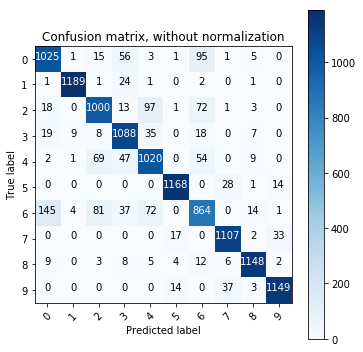

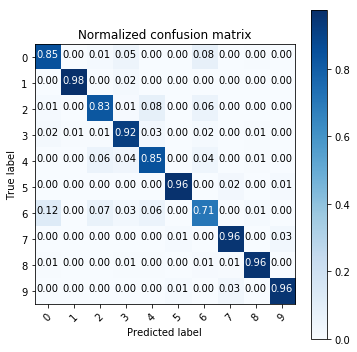

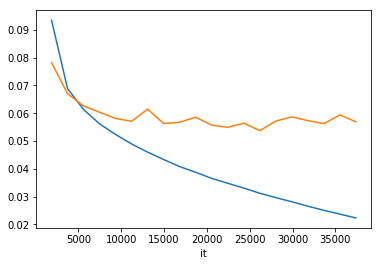

In [10]:
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 256, 'relu',  label="H1")
h2 = network.Layer(256, 100, 'relu',  label="H2")
o1 = network.Layer(100, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(h2)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

## Model 128 -> 256 -> 100

Model Summary
-------------------------------
H1      (input=784, neurons=128, activation=relu)
H2      (input=128, neurons=256, activation=relu)
H3      (input=256, neurons=100, activation=relu)
soft    (input=100, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 1870 Batch: 178 Epoch 9 Train Loss: 0.10068865 lr: 0.000100 Val Loss: 0.07600610 Val Acc 0.84433333
It: 3740 Batch: 168 Epoch 19 Train Loss: 0.06939103 lr: 0.000100 Val Loss: 0.06750331 Val Acc 0.86158333
It: 5610 Batch: 158 Epoch 29 Train Loss: 0.06158960 lr: 0.000100 Val Loss: 0.06514066 Val Acc 0.86883333
It: 7480 Batch: 148 Epoch 39 Train Loss: 0.05624991 lr: 0.000100 Val Loss: 0.06142715 Val Acc 0.87458333
It: 9350 Batch: 138 Epoch 49 Train Loss: 0.05215367 lr: 0.000100 Val Loss: 0.05819839 Val Acc 0.88150000
It: 11220 Batch: 128 Epoch 59 Train Loss: 0.04886439 lr: 0.000100 Val Loss: 0.06228648 Val Acc 0.87441667
It: 13090 Batch: 118 Epoch 69 Train Loss: 0.04578699 lr: 0.000100 Val Loss: 0.05

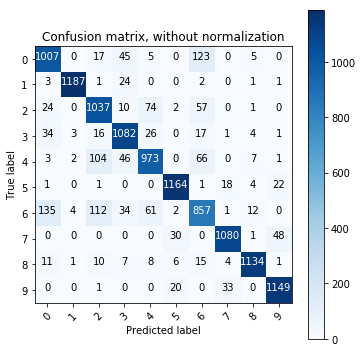

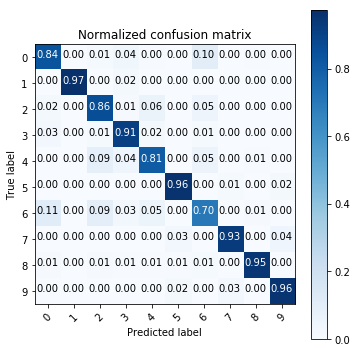

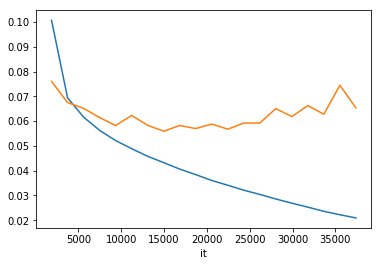

In [11]:
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 128, 'relu',  label="H1")
h2 = network.Layer(128, 256, 'relu',  label="H2")
h3 = network.Layer(256, 100, 'relu',  label="H3")
o1 = network.Layer(100, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(h2)
model.add_layer(h3)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

## Conclusion 
There are no considerable difference in the adittion of more layers to the model. 